In [10]:
import networkx as nx
import matplotlib.pyplot as plt
from math import sqrt, floor
from numpy import linspace
from random import sample
from pandas import DataFrame

In [18]:
sizes = [10**3, 10**4, 10**5, 10**6]
ws_k = [2, 4, 6]
fs = linspace(0.1, 0.9, 20)
resultList = []

for size in sizes:
    for k in ws_k:
        rg_beta = k/(size-1)
        ba_m = floor((size-sqrt(size*(size-(2*k))))/2)
        ws = nx.watts_strogatz_graph(size, k, 0.01) 
        rg = nx.fast_gnp_random_graph(size, rg_beta)
        ba = nx.barabasi_albert_graph(size, ba_m)
        print(len(ws.edges), len(rg.edges), len(ba.edges))
        for f in fs:
            ws_c = ws.copy()
            ws_r = sorted(ws_c.degree, key = lambda x: x[1], reverse = True)
            ws_r = ws_r[:floor(f*size)]
            for (r, _) in ws_r:
                ws_c.remove_node(r)
            ws_cc = max(nx.algorithms.centrality.closeness_centrality(ws_c).values())
            ws_bc = max(nx.algorithms.centrality.betweenness_centrality(ws_c).values())
            
            rg_c = rg.copy()
            rg_r = sorted(rg_c.degree, key = lambda x: x[1], reverse = True)
            rg_r = rg_r[:floor(f*size)]
            for (r, _) in rg_r:
                rg_c.remove_node(r)
            rg_cc = max(nx.algorithms.centrality.closeness_centrality(rg_c).values())
            rg_bc = max(nx.algorithms.centrality.betweenness_centrality(rg_c).values())

            ba_c = ba.copy()
            ba_r = sorted(ba_c.degree, key = lambda x: x[1], reverse = True)
            ba_r = ba_r[:floor(f*size)]
            for (r, _) in ba_r:
                ba_c.remove_node(r)
            ba_cc = max(nx.algorithms.centrality.closeness_centrality(ba_c).values())
            ba_bc = max(nx.algorithms.centrality.betweenness_centrality(ba_c).values())

            resultList.append({  'n' : size
                               , 'k' : k
                               , 'f' : f
                               , 'ws_cc' : ws_cc
                               , 'rg_cc' : rg_cc
                               , 'ba_cc' : ba_cc
                               , 'ws_bc' : ws_bc
                               , 'rg_bc' : rg_bc
                               , 'ba_bc' : ba_bc
            })
        
results = DataFrame(resultList)
        

1000 915 999
2000 2092 1996
3000 2952 2991
10000 9985 9999
20000 20000 19996
30000 29803 29991
100000 99998 99999


KeyboardInterrupt: 

In [20]:
results = DataFrame(resultList)


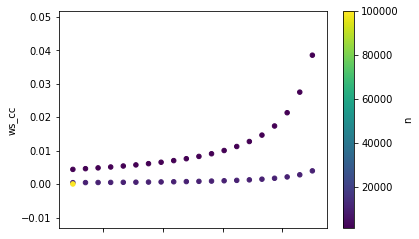

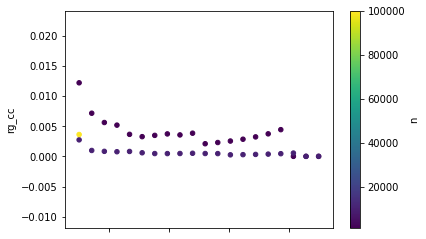

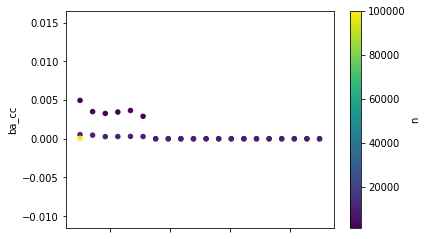

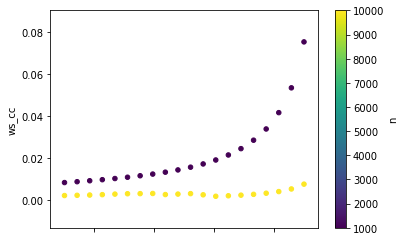

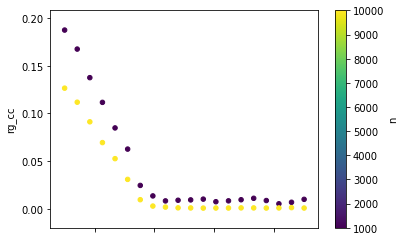

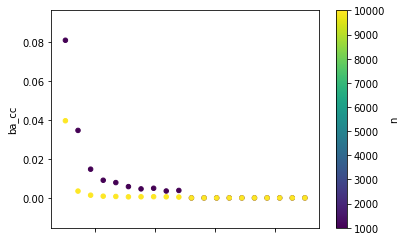

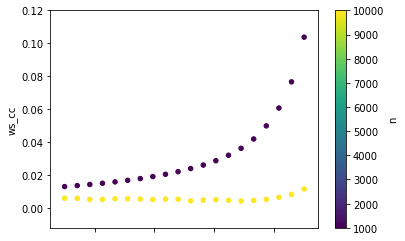

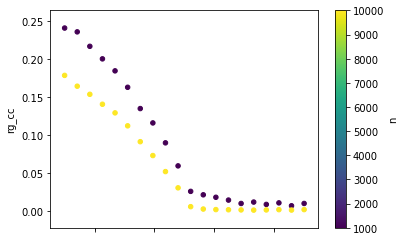

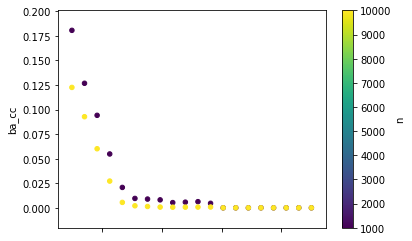

In [21]:
results.where(results["k"]==2).plot.scatter(x="f", y="ws_cc",c="n",colormap='viridis')
results.where(results["k"]==2).plot.scatter(x="f", y="rg_cc",c="n",colormap='viridis')
results.where(results["k"]==2).plot.scatter(x="f", y="ba_cc",c="n",colormap='viridis')

results.where(results["k"]==4).plot.scatter(x="f", y="ws_cc",c="n",colormap='viridis')
results.where(results["k"]==4).plot.scatter(x="f", y="rg_cc",c="n",colormap='viridis')
results.where(results["k"]==4).plot.scatter(x="f", y="ba_cc",c="n",colormap='viridis')

results.where(results["k"]==6).plot.scatter(x="f", y="ws_cc",c="n",colormap='viridis')
results.where(results["k"]==6).plot.scatter(x="f", y="rg_cc",c="n",colormap='viridis')
results.where(results["k"]==6).plot.scatter(x="f", y="ba_cc",c="n",colormap='viridis')

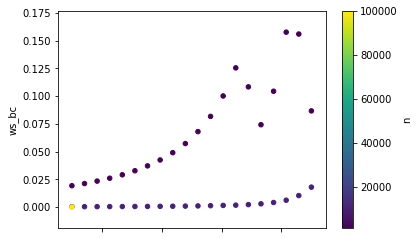

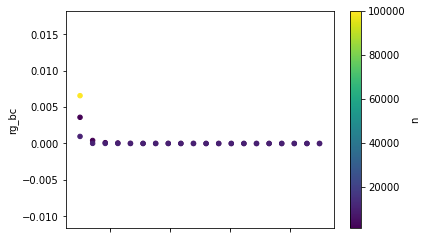

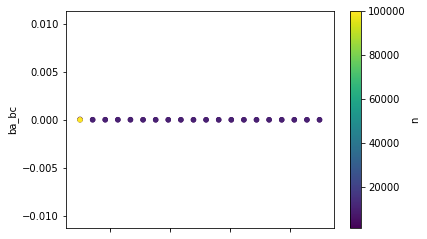

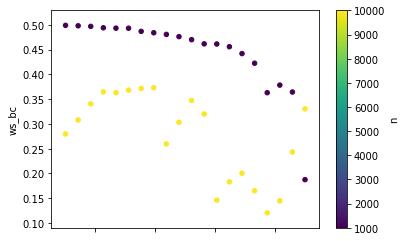

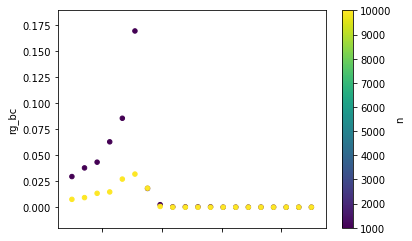

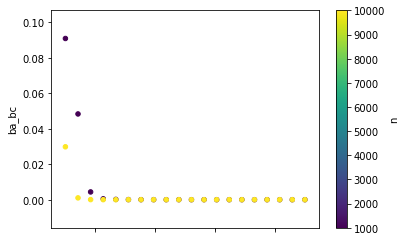

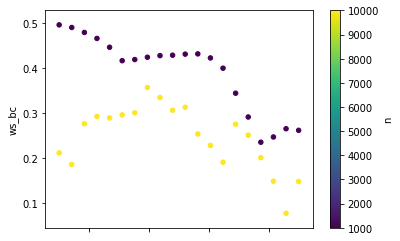

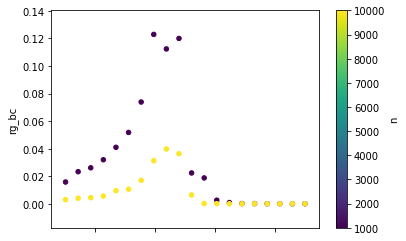

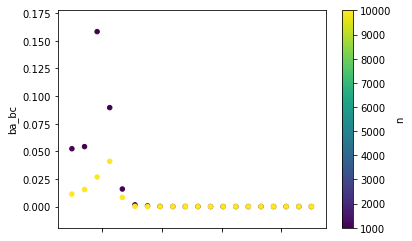

In [22]:
results.where(results["k"]==2).plot.scatter(x="f", y="ws_bc",c="n",colormap='viridis')
results.where(results["k"]==2).plot.scatter(x="f", y="rg_bc",c="n",colormap='viridis')
results.where(results["k"]==2).plot.scatter(x="f", y="ba_bc",c="n",colormap='viridis')

results.where(results["k"]==4).plot.scatter(x="f", y="ws_bc",c="n",colormap='viridis')
results.where(results["k"]==4).plot.scatter(x="f", y="rg_bc",c="n",colormap='viridis')
results.where(results["k"]==4).plot.scatter(x="f", y="ba_bc",c="n",colormap='viridis')

results.where(results["k"]==6).plot.scatter(x="f", y="ws_bc",c="n",colormap='viridis')
results.where(results["k"]==6).plot.scatter(x="f", y="rg_bc",c="n",colormap='viridis')
results.where(results["k"]==6).plot.scatter(x="f", y="ba_bc",c="n",colormap='viridis')